In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.datasets
from sklearn.decomposition import PCA, TruncatedSVD

### Nacitaj tvare

In [2]:
_, _, files = list(os.walk("photos64"))[0]

faces = dict()

for f in files:
    f.encode('unicode_escape')
    img = cv2.imread("photos64/"+f)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces[f] = gray


### Nacitanie trenovacieho dataset

In [3]:
images = sklearn.datasets.fetch_olivetti_faces()["images"]

In [4]:
images.shape

(400, 64, 64)

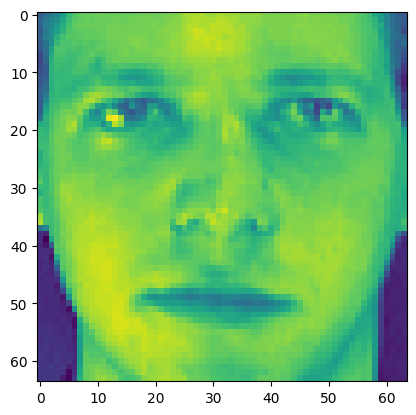

In [5]:
plt.imshow(images[0])

### Priemerna tvar

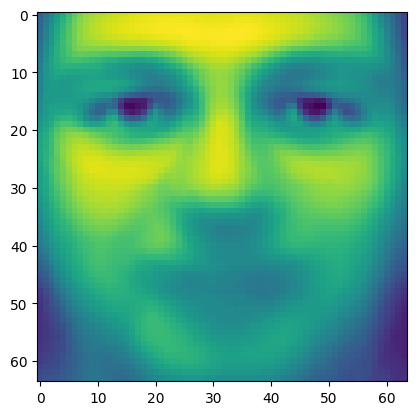

In [27]:
avg_face = np.zeros(64*64)    
for face in images:
    face_vec = face.flatten()
    #face_vec = face_vec.reshape(face_vec.shape[0], 1)
    avg_face += face_vec

avg_face = avg_face/len(images)
avg_face_img = avg_face.reshape(64, 64)
plt.imshow(avg_face_img)

### Rozdielny trenovacich oproti priemernej tvary

In [28]:
face_train_diffs = list()
for face in images:
    face_vec = face.flatten()
    face_train_diffs.append(face_vec - avg_face)

### Vypocitaj eigenfaces

In [29]:
A = np.matrix([i for i in face_train_diffs]).T
U, S, VT = np.linalg.svd(A, full_matrices=0)
U.shape

(4096, 400)

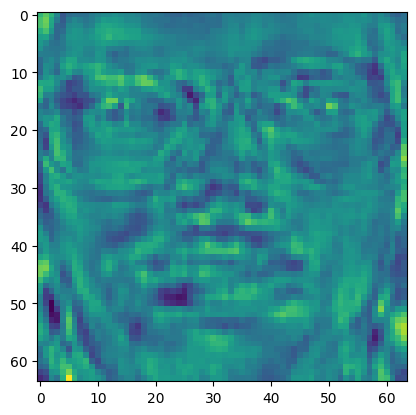

In [30]:
plt.imshow(U[:, 100].reshape(64, 64))

### Rozdielny nasich oproti priemernej tvary

In [31]:
face_diffs = dict()
for name, face in faces.items():
    face = cv2.blur(face,(5,5))
    face_vec = face.flatten()
    face_diffs[name] = face_vec - avg_face

### Vypocitaj koeficienty eigenfaces pre jednotlive tvare

In [172]:
%%time
face_vals = dict()
modes = [5, 6, 7, 8]
for name, face in face_diffs.items():
    val = (np.ravel(U[:, modes].T @ face))
    face_vals[name] = val

CPU times: total: 15.6 ms
Wall time: 35 ms


AIN extra_Alexander Simko_align.jpg        KTVS_mokus2-ktvs_align.jpg                 139.276955779554811
AIN extra_Andrej Lucny_align.jpg           KTF_Marian Fecko PhD_align.jpg             136.60538024664956
AIN extra_Barbora Cimrova_align.jpg        INF_Adriana Pazicka_align.jpg              287.113352425031053
AIN extra_Damas Gruska_align.jpg           KDMFI_vankus1_align.jpg                    110.823301700556513
AIN extra_Dusan Guller_align.jpg           AIN_Vladimir Boza_align.jpg                78.8831798192237699
AIN extra_Frantisek Gyarfas_align.jpg      AIN_Peter Nather_align.jpg                 238.198963624440125
AIN extra_Jan Komara_align.jpg             KJFB_Pavel Povinec DrSc_align.jpg          171.953691956593303
AIN extra_Lubica Benuskova_align.jpg       AIN_Zuzana Cernekova_align.jpg             376.201056131992061
AIN extra_Maria Markosova_align.jpg        MAT_muzslayova7_align.jpg                  71.8010639162833684
AIN extra_Martin Takac_align.jpg           KTF_

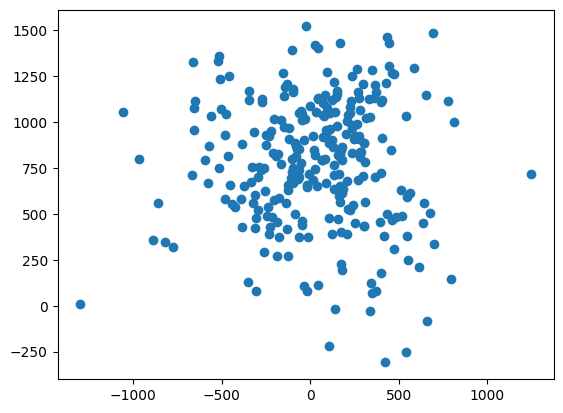

In [174]:
pca = []
cols = []
for name1, val1 in face_vals.items():
    best_dist = float("inf")
    pca.append(val1)
    best_name = ""
    for name2, val2 in face_vals.items():
        if name1 != name2 and np.linalg.norm(val1 - val2) < best_dist:

            best_dist = np.linalg.norm(val1 - val2)
            best_name = name2
    #print("Najpodobnejsia tvar k", name1, "je", best_name, best_dist)
    print(f"{name1:42} {best_name:42} {best_dist:1.18}")

pca = np.array(pca)
print(pca.shape)
plt.scatter(x=pca[:, 0], y=pca[:, 1])

In [175]:
names = []
vals = []
for name, face in face_vals.items():
    names.append(name)
    vals.append(face)

### Hľadanie lakťa na celych dátach

C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

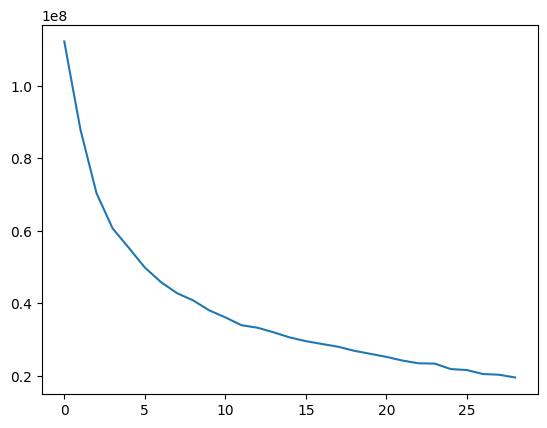

In [177]:
iner = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i, random_state=3, algorithm="lloyd").fit(vals)
    iner.append(kmeans.inertia_)

plt.plot(iner)

In [ ]:
for name1, val1 in face_vals.items():
    best_dist = float("inf")
    best_name = ""
    for name2, val2 in face_vals.items(): 
        if name1 != name2 and np.linalg.norm(val1 - val2) < best_dist:
            best_dist = np.linalg.norm(val1 - val2)
            best_name = name2
    #print("Najpodobnejsia tvar k", name1, "je", best_name, best_dist)
    print(f"{name1:42} {best_name:42} {best_dist:1.18}")
            


C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


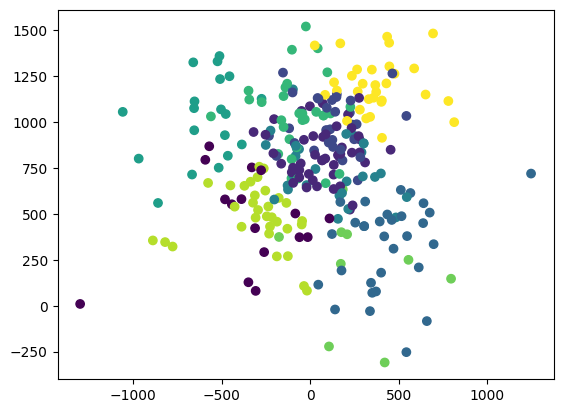

In [178]:
kmeans = KMeans(n_clusters=10, random_state=0, algorithm="lloyd").fit(pca)
plt.scatter(x=pca[:, 0], y=pca[:, 1], c=kmeans.labels_)

In [179]:
kmeans.labels_

array([6, 1, 3, 2, 8, 8, 1, 7, 2, 2, 1, 4, 8, 8, 3, 0, 4, 2, 1, 5, 4, 0,
       1, 0, 3, 5, 9, 6, 4, 4, 8, 6, 7, 6, 8, 1, 3, 3, 9, 7, 4, 7, 1, 7,
       2, 6, 7, 4, 6, 0, 4, 5, 9, 1, 5, 8, 4, 3, 6, 6, 8, 2, 1, 8, 3, 7,
       7, 4, 3, 2, 3, 6, 1, 4, 3, 9, 5, 9, 1, 9, 8, 8, 6, 0, 1, 9, 2, 3,
       6, 3, 8, 6, 2, 9, 6, 2, 5, 0, 4, 9, 8, 9, 9, 9, 9, 4, 9, 1, 0, 9,
       3, 9, 4, 9, 4, 1, 8, 9, 9, 1, 9, 8, 4, 1, 6, 1, 2, 3, 6, 2, 2, 9,
       8, 1, 9, 8, 1, 9, 9, 4, 8, 1, 4, 2, 3, 3, 3, 4, 5, 0, 9, 6, 8, 3,
       3, 2, 3, 2, 3, 8, 8, 3, 0, 1, 1, 6, 8, 6, 1, 1, 2, 1, 5, 2, 1, 8,
       4, 2, 1, 8, 4, 3, 1, 1, 4, 6, 2, 8, 0, 1, 6, 1, 1, 9, 4, 1, 3, 2,
       8, 1, 8, 2, 6, 2, 8, 1, 1, 8, 5, 4, 1, 9, 1, 4, 2, 5, 2, 1, 1, 8,
       2, 9, 1, 0, 2, 3, 3, 0, 6, 9, 0, 9, 0, 7, 0, 6, 5, 5, 3, 1, 5, 4,
       2, 3, 1, 4, 6, 8, 8, 0, 6, 5, 4, 9, 1, 6, 1, 2, 5, 1, 6, 2, 3, 5,
       6, 5, 5, 6, 3, 6, 5, 1, 3, 1])